# EDA-Assignment


In [12]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd


file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"

url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

# Display first 10 rows
print("First 10 rows:")
print(df.head(10))

# Show shape
print("\nShape of dataset:", df.shape)

# Show column names
print("\nColumn names:")
print(df.columns.tolist())







First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

In [13]:
# Question 2 : Check for missing values in all columns and describe your approach for handling them.

print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [14]:
# ex_showroom_price column has 435, now check for column data type and unique values of column.

print("Data type of 'ex_showroom_price':", df['ex_showroom_price'].dtype)

print("\nUnique values in 'ex_showroom_price':")
print(df['ex_showroom_price'].unique())
print("\nNumber of unique values:", df['ex_showroom_price'].nunique())




Data type of 'ex_showroom_price': float64

Unique values in 'ex_showroom_price':
[     nan  148114.   89643.   53857.   87719.   60122.   78712.   47255.
   95955.  351680.   58314.  117926.  132680.   44389.   53900.   56147.
   84751.   61600.   79432.   78350.   71049.   57557.  202310.   71150.
   56750.   84042.   69750.   59844.   42859.   73413.   49900.   59422.
   57549.   51994.   80350.   54605.   88161.   78513.   50098.  195500.
   92074.  164004.   74295.   49642.   51112.   53751.   50267.   61653.
   70851.   53079.  133680.  181445.   65626.   58438.   61118.   75936.
  180525.   87543.   80435.   85011. 1278000.  155740.  202127.   86744.
  156304.   84246.   49521.   64589.   69983.   54299.   72303.   65800.
   58757.   47032.   79233.  118997.   52949.   64071.   61545.  168482.
  163331.   59095.   75502.   52271.   63331.   52372.   58630.   94703.
   53436.   59183.   56925.   55980.   52790.   81508.  199275.   87042.
  107500.   67187.   67214.   49412.  59900

In [15]:
# now check for which bike have average price


avg_price_per_bike = df.groupby('name')['ex_showroom_price'].mean().reset_index()

# Display the result
print(avg_price_per_bike)



                           name  ex_showroom_price
0                     Activa 3g            53000.0
1                     Activa 4g            51000.0
2                Aprilia SR 125                NaN
3                    BMW G310GS           349000.0
4                 Bajaj  ct 100            32000.0
..                          ...                ...
274            Yamaha YZF R15 S           117926.0
275           Yamaha YZF R15 V3           146400.0
276  Yamaha YZF R15 [2011-2018]           118997.0
277               Yamaha YZF R3           351680.0
278                    Yo Style            37675.0

[279 rows x 2 columns]


In [ ]:
# based on the above data shows that diffrent type of bike have diffrent price , hence missing value of ex_showroom_price column can be replace with mean price of bike type

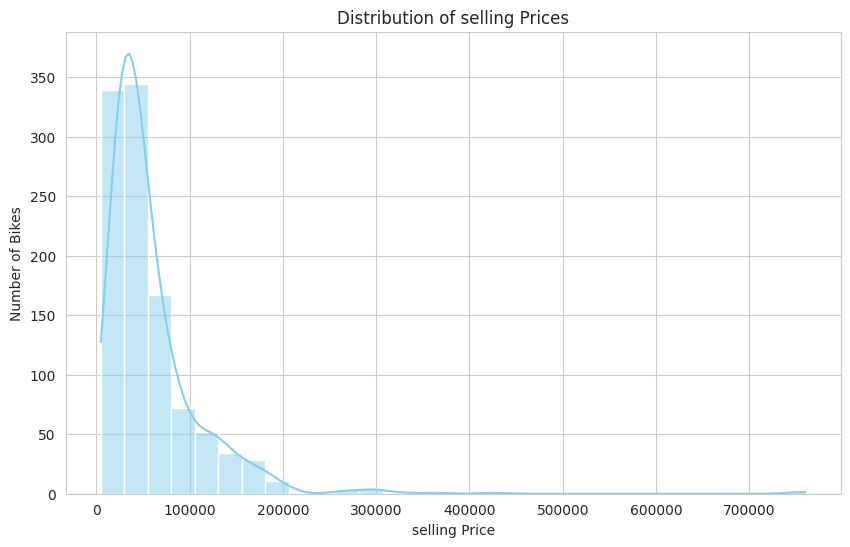

In [16]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set style for the plot
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('selling Price')
plt.ylabel('Number of Bikes')
plt.title('Distribution of selling Prices')

plt.show()


In [ ]:
# the overall trend of bike selling price is under 1 lakh.

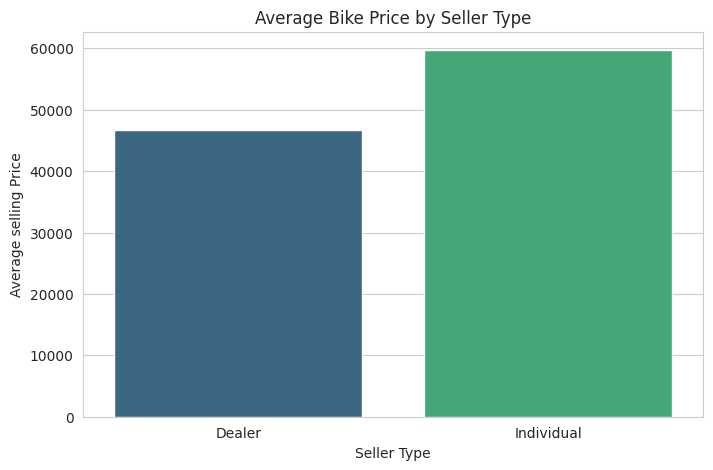

In [19]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import warnings
warnings.filterwarnings('ignore')

# Calculate average price per seller_type
avg_price_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_seller, palette='viridis')

# Add labels and title
plt.xlabel('Seller Type')
plt.ylabel('Average selling Price')
plt.title('Average Bike Price by Seller Type')

plt.show()


In [ ]:
# observation: average selling price for dealar is cheaper than individual seller.

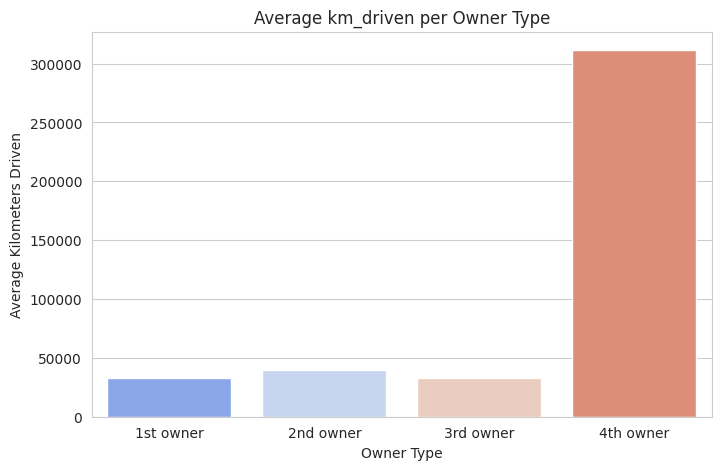

In [20]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import warnings
warnings.filterwarnings('ignore')

# Calculate average km_driven per owner
avg_km_per_owner = df.groupby('owner')['km_driven'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km_per_owner, palette='coolwarm')

# Add labels and title
plt.xlabel('Owner Type')
plt.ylabel('Average Kilometers Driven')
plt.title('Average km_driven per Owner Type')

plt.show()


In [21]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Step 1: Show summary statistics before removing outliers
print("Summary statistics before removing outliers:")
print(df['km_driven'].describe())

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Step 3: Calculate IQR
IQR = Q3 - Q1

# Step 4: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Filter data to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 6: Show summary statistics after removing outliers
print("\nSummary statistics after removing outliers:")
print(df_no_outliers['km_driven'].describe())


Summary statistics before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


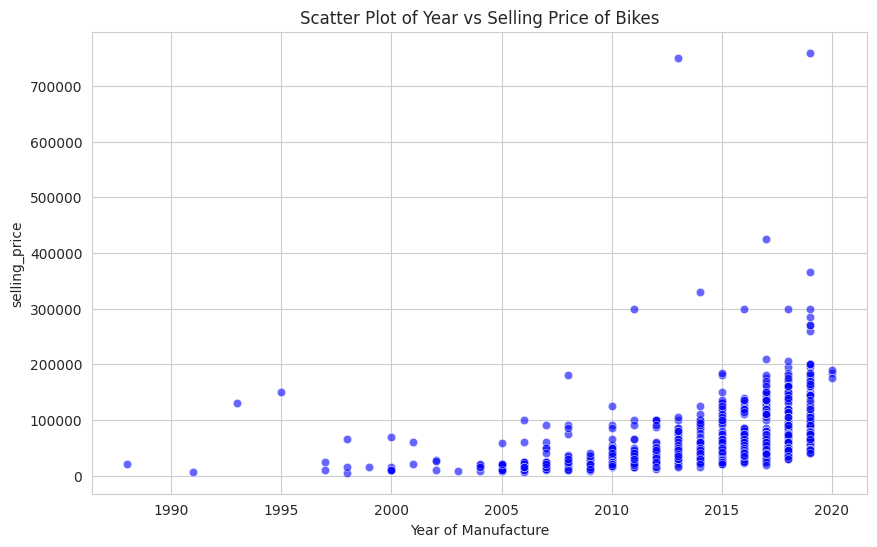

In [23]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

sns.set_style("whitegrid")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year of Manufacture')
plt.ylabel('selling_price')
plt.title("Scatter Plot of Year vs Selling Price of Bikes")

plt.show()


In [24]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')

# Display the first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


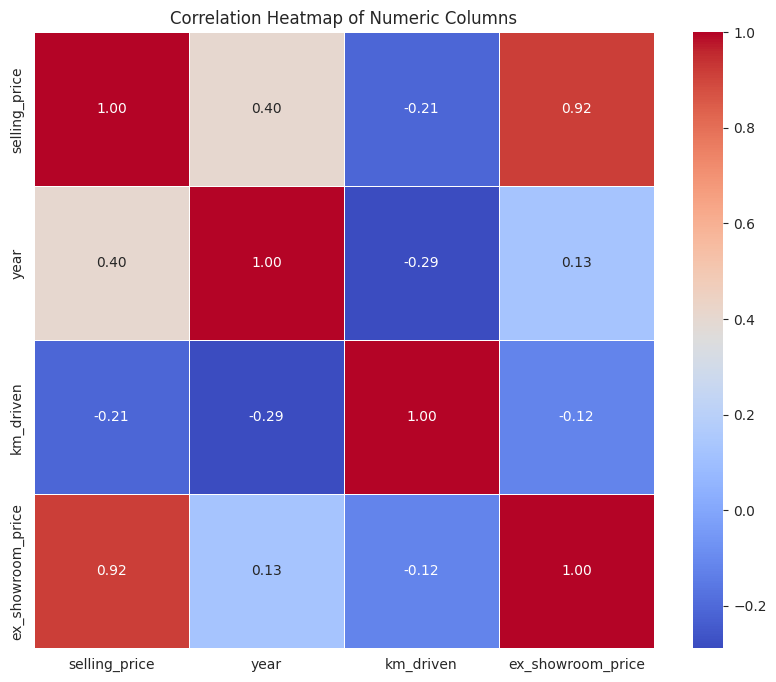

In [25]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


# Calculate correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [ ]:
# ex showroom price and seeling price have postive strong correlation
# year of manufactring  and seeling price have postive moderalte correlation
# km drive and seeling price have nagative correlation

In [ ]:
# Question 10: Summarize your findings in a brief report: What are the most important factors affecting a bike's selling price?
#  Mention any data cleaning or feature engineering you performed.

"""
Here’s a concise report summarizing your Bike Details dataset analysis:

1.  Key Factors Affecting Selling Price are Year of Manufacture, Kilometers Driven, Seller Type and Bike Model / Name

2. Data Cleaning Performed: Missing values treatment, Outlier removal using IQR method,
3. Feature Engineering: One-hot encoding for seller_type
4. Visual Insights: Histogram of prices, Scatter plot (`year` vs `price`), Bar plots (seller_type` vs average price) and owner vs average km driven,
Heatmap (year and km_driven)

"""